In [0]:
import numpy as np

# 데이터셋 생성
x_train = np.random.random((1000, 12))
y_train = np.random.randint(10, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(10, size=(100, 1))

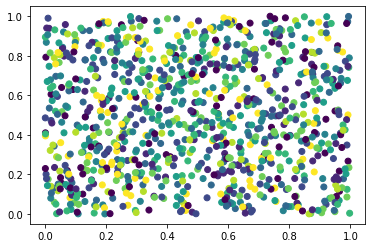

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# 데이터셋 확인 (2차원)
plot_x = x_train[:, 0]
plot_y = x_train[:, 1]
plot_color = y_train.reshape(1000,)

plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

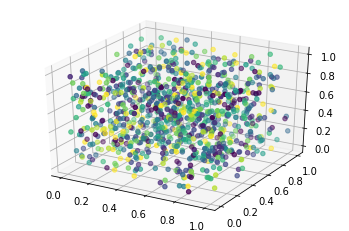

In [7]:
# 데이터셋 확인 (3차원)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_x = x_train[:, 0]
plot_y = x_train[:, 1]
plot_z = x_train[:, 2]
plot_color = y_train.reshape(1000,)

ax.scatter(plot_x, plot_y, plot_z, c=plot_color)
plt.show()

In [6]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import random

Using TensorFlow backend.


In [0]:
# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(10, size=(1000, 1))

x_test = np.random.random((100, 12))
y_test = np.random.randint(10, size=(100, 1))

In [10]:
print(y_test)

[[4]
 [4]
 [5]
 [9]
 [9]
 [3]
 [7]
 [7]
 [9]
 [8]
 [4]
 [3]
 [4]
 [0]
 [8]
 [0]
 [9]
 [1]
 [4]
 [9]
 [3]
 [4]
 [4]
 [8]
 [0]
 [1]
 [4]
 [2]
 [9]
 [4]
 [9]
 [9]
 [1]
 [0]
 [0]
 [1]
 [8]
 [1]
 [1]
 [5]
 [2]
 [4]
 [1]
 [9]
 [7]
 [0]
 [5]
 [9]
 [0]
 [0]
 [5]
 [3]
 [6]
 [0]
 [5]
 [0]
 [8]
 [5]
 [0]
 [1]
 [0]
 [8]
 [2]
 [4]
 [4]
 [9]
 [2]
 [6]
 [7]
 [8]
 [0]
 [0]
 [3]
 [5]
 [1]
 [0]
 [7]
 [7]
 [1]
 [3]
 [5]
 [9]
 [1]
 [4]
 [7]
 [4]
 [3]
 [9]
 [4]
 [0]
 [2]
 [9]
 [0]
 [3]
 [4]
 [7]
 [7]
 [6]
 [1]
 [3]]


In [0]:
y_train = to_categorical(y_train, num_classes=10) # one-hot 인코딩
y_test = to_categorical(y_test, num_classes=10)   # one-hot 인코딩

In [12]:
print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(10, input_dim=12, activation='softmax'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)

Epoch 1/1000
1000/1000 [==============================] - 0s 222us/step - loss: 2.4567 - accuracy: 0.0850
Epoch 2/1000
1000/1000 [==============================] - 0s 19us/step - loss: 2.4246 - accuracy: 0.0810
Epoch 3/1000
1000/1000 [==============================] - 0s 19us/step - loss: 2.4023 - accuracy: 0.0800
Epoch 4/1000
1000/1000 [==============================] - 0s 17us/step - loss: 2.3848 - accuracy: 0.0890
Epoch 5/1000
1000/1000 [==============================] - 0s 19us/step - loss: 2.3711 - accuracy: 0.0920
Epoch 6/1000
1000/1000 [==============================] - 0s 22us/step - loss: 2.3608 - accuracy: 0.0930
Epoch 7/1000
1000/1000 [==============================] - 0s 20us/step - loss: 2.3527 - accuracy: 0.0940
Epoch 8/1000
1000/1000 [==============================] - 0s 19us/step - loss: 2.3468 - accuracy: 0.0970
Epoch 9/1000
1000/1000 [==============================] - 0s 19us/step - loss: 2.3420 - accuracy: 0.0930
Epoch 10/1000
1000/1000 [=============================

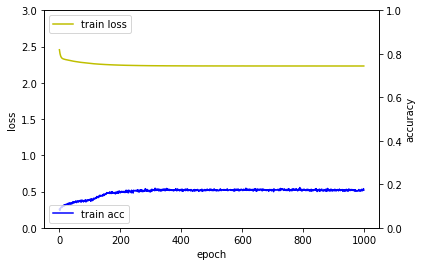

In [16]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 3.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [17]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics :', loss_and_metrics)

100/100 [==============================] - 0s 248us/step
loss_and_metrics : [2.325002784729004, 0.10999999940395355]
